 # [Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-dependence-plots)

Some people complain that machine learning models are black boxes.  
These people will argue we cannot see how these models are working on any given dataset, so we can neither extract insight nor identify problems with the model.  
By and large, people making this claim are unfamiliar with partial dependence plots.  
Partial dependence plots show how each variable or predictor affects the model's predictions.  
This is useful for questions like:  
* How much of the wage differences between men and women are due solely to gender, as opposed to differences in education backgrounds or work experience?  
* Controlling for house characteristics, what impact do longitude and latitude have on home prices? To restate this, we want to understand how similarly sized houses would be priced in different areas, even if the homes actually at these sites are different sizes.  
* Are health differences between two groups due to differences in their diets, or due to other factors?  

If you are familiar with linear or logistic regression models, partial dependence plots can be interepreted similarly to the coefficients in those models.  
But partial dependence plots can capture more complex patterns from your data, and they can be used with any model.  
If you aren't familiar with linear or logistic regressions, don't get caught up on that comparison.  
We will show a couple examples below, explain what they mean, and then talk about the code.

## Interpreting Partial Dependence Plots

We'll begin with 2 partial dependence plots showing the relationship (according to the model) between Price and other variables from the Melbourne Housing dataset.

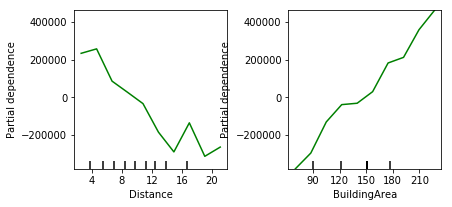

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

cols_to_use = ['Distance', 'Landsize', 'BuildingArea']

def get_some_data():
    data = pd.read_csv('input/melbourne_data.csv')
    y = data.Price
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y

X, y = get_some_data()
my_model = GradientBoostingRegressor()
my_model.fit(X, y)
my_plots = plot_partial_dependence(my_model, features=[0,2], X=X, feature_names=cols_to_use, grid_resolution=10)
plt.show()

The left plot shows the partial dependence between our target, Sales Price, and the distance variable.  
Distance in this dataset measures the distance to Melbourne's central business district.  
The partial dependence plot is calculated only after the model has been fit.  
The model is fit on real data.  
In that real data, houses in different parts of town may differ in myriad ways (different ages, sizes), but after the model is fit, we could start by taking all the characteristics of a single house.  
Say, a house with 2 bedrooms, 2 bathrooms, a large lot, an age of 10 years, and the like.  
We then use the model to predict the price of that house, but we change the distance variable before making a prediction.  
We first predict the price for that house when setting the distance to 4.  
We then move the price setting distance to 5, then 6, and so on.  
We trace out how the predicted price changes (on the vertical axis) as we move from small values of distance to large values (on the horizontal axis).  

In this description, we used only a single house.  
But because of the peculiar mix of interactions, the partial dependence plot for a single house may overfit.  
So, instead we repeat that experiment with multiple houses, and we plot the average predicted price on the vertical axis.  
You'll see some negative numbers, but that doesn't mean the price would sell for a negative price.  
Instead it means the prices would have been less than the actual average price for that distance.  
In the left graph, we see house prices fall as we get further from the central business district.  
Though there seems to be a nice suburb about 16 kilometers out, where home prices are higher than in other suburbs.  
The right graph shows the impact of building area, which is interpreted similarly.  
A larger building area means higher prices.  
These plots are useful both to extract insights, as well as to sanity check that your model is learning something you think is sensible.

### Examples of plots and the code that creates them: